In [6]:
! python -m pip install matplotlib
! python -m pip install cobra
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline


C:\Users\Valeria Stavila\AppData\Local\Temp\ipykernel_9184\1553195621.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# Application of genome-scale metabolic models

## Model import

You can download a GSM using `cobra.io.read_sbml_model`. Let's load the latest iteration of the *Escherchia coli* GSM iML1515 ([nature.com/articles/nbt.3956](https://www.nature.com/articles/nbt.3956)).

In [7]:
from cobra.io import read_sbml_model
model = read_sbml_model('data/iML1515.xml')


## Model content

### Metabolites

The model contains a list of metabolites. Here are the first ten.

In [3]:
model.metabolites[0:10]

[<Metabolite octapb_c at 0x26476241c10>,
 <Metabolite cysi__L_e at 0x26476241bd0>,
 <Metabolite dhap_c at 0x26476241e10>,
 <Metabolite prbatp_c at 0x26476241f50>,
 <Metabolite 10fthf_c at 0x26476242690>,
 <Metabolite btal_c at 0x26476242fd0>,
 <Metabolite 6pgg_c at 0x26476243dd0>,
 <Metabolite co2_e at 0x26476243f50>,
 <Metabolite akg_e at 0x2647624c690>,
 <Metabolite gsn_e at 0x2647624c8d0>]

How many metabolites are in the model?

In [10]:
model.metabolites[:] # displays all the elements of the array
count = len(model.metabolites) #counts the elements of the metabolites array
print(count)

1877


One can access a specific metabolite using dot notation.

In [3]:
model.metabolites.g3p_c
model.metabolites.asp__L_c

Metabolite identifier,asp__L_c
Name,L-Aspartate
Memory address,0x13fccb5a050
Formula,C4H6NO4
Compartment,c
In 23 reaction(s),"ASPt2_3pp, ASPO4, ASPO3, ASPt2_2pp, ASPO5, ASPK, ASPabcpp, ASPO6, ASPTA, ASPt2pp, ADSS, ASP1DC, ASNN, BIOMASS_Ec_iML1515_core_75p37M, ASPtpp, SUCASPtpp, ASPT, BIOMASS_Ec_iML1515_WT_75p37M, ASNS1,..."


<div class="alert alert-warning">

**Warning:** One cannot use dot notation to access metabolites, reactions, or genes if their identifiers do not resemble proper Python variable names.

</div>

In [9]:
# model.metabolites.10fthf_c  # this won't work, you can try by uncommenting the line

<div class="alert alert-success">

**Solution:** Use the method `get_by_id` instead!

</div>

In [8]:
model.metabolites.get_by_id('10fthf_c')

Metabolite identifier,10fthf_c
Name,10-Formyltetrahydrofolate
Memory address,0x2adae633d50
Formula,C20H21N7O7
Compartment,c
In 8 reaction(s),"ULA4NFT, AICART, FTHFLi, FTHFD, MTHFC, BIOMASS_Ec_iML1515_core_75p37M, GARFT, BIOMASS_Ec_iML1515_WT_75p37M"


Metabolites are associated with compartments in the cell. Glyceraldehyde 3-phosphate (`g3p_c`) is associated with the `c` (Cytosol) compartment.

In [10]:
model.metabolites.g3p_c.compartment

'c'

The _E. coli_ model has three compartments.

In [9]:
model.compartments

{'c': 'cytosol', 'e': 'extracellular space', 'p': 'periplasm'}

Some metabolites (like Glucose for example) can be associated with multiple compartments.

In [11]:
model.metabolites.glc__D_c.compartment

'c'

In [11]:
model.metabolites.glc__D_p.compartment

'p'

The full name of the metabolite is available via the `.name` attribute. 

In [7]:
model.metabolites.glc__D_c.name
model.metabolites.asp__L_c.name

'L-Aspartate'

One can look up the molecular formula of glucose.

In [13]:
model.metabolites.g3p_c.formula

'C3H5O6P'

The `.elements` attribute returns a dictionary representation of the formula.

In [14]:
model.metabolites.g3p_c.elements

{'C': 3, 'H': 5, 'O': 6, 'P': 1}

Furthermore, one can look up the molecular weight of a metabolite.

In [14]:
model.metabolites.g3p_c.formula_weight

168.041961

One can gather additional information (like references to external datbases) about the metabolite through the annotation attribute.

In [16]:
model.metabolites.g3p_c.annotation

{'sbo': 'SBO:0000247',
 'bigg.metabolite': 'g3p',
 'biocyc': 'META:GAP',
 'chebi': ['CHEBI:5446',
  'CHEBI:14333',
  'CHEBI:12984',
  'CHEBI:181',
  'CHEBI:17138',
  'CHEBI:21026',
  'CHEBI:12983',
  'CHEBI:18324',
  'CHEBI:58027',
  'CHEBI:59776',
  'CHEBI:29052'],
 'hmdb': 'HMDB01112',
 'inchi_key': 'LXJXRIRHZLFYRP-VKHMYHEASA-L',
 'kegg.compound': ['C00661', 'C00118'],
 'metanetx.chemical': 'MNXM74',
 'reactome.compound': '29578',
 'sabiork': ['27', '1687'],
 'seed.compound': ['cpd00102', 'cpd19005']}

One can use these annotations to look up the compound on [KEGG](http://www.genome.jp/dbget-bin/www_bget?cpd:C00118) for example.

Metabolites are not isolated things. They participate in reactions as substrates and products.

In [15]:
model.metabolites.g3p_c.reactions

frozenset({<Reaction DDPGALA at 0x2647fa31f10>,
           <Reaction DRPA at 0x2647fef2190>,
           <Reaction DXPS at 0x2647fa09210>,
           <Reaction EDA at 0x2647f827fd0>,
           <Reaction F6PA at 0x2647fac60d0>,
           <Reaction FBA at 0x2647f8aeb90>,
           <Reaction GAPD at 0x2647fd08a50>,
           <Reaction GAPP at 0x26405f63290>,
           <Reaction TALA at 0x2647f7ea910>,
           <Reaction TGBPA at 0x2647fa59590>,
           <Reaction TKT1 at 0x2647f907ed0>,
           <Reaction TKT2 at 0x2647ff29fd0>,
           <Reaction TPI at 0x264058a5490>,
           <Reaction TRPS1 at 0x2647fccd850>,
           <Reaction TRPS3 at 0x2647fab3e10>})

### Reactions

The model contains a list of reactions. Here are the first 10 of them.

In [16]:
model.reactions[0:10]

[<Reaction CYTDK2 at 0x2647f784150>,
 <Reaction XPPT at 0x2647f784110>,
 <Reaction HXPRT at 0x2647f785650>,
 <Reaction NDPK5 at 0x2647f785610>,
 <Reaction SHK3Dr at 0x2647f7857d0>,
 <Reaction NDPK6 at 0x2647f786810>,
 <Reaction NDPK8 at 0x2647f787850>,
 <Reaction DHORTS at 0x2647f787b50>,
 <Reaction OMPDC at 0x2647f78e3d0>,
 <Reaction PYNP2r at 0x2647f78f5d0>]

How many reactions are in the model?

In [17]:
len (model.reactions)

2712

Let's take a closer look at the reactions associated with Glyceraldehyde 3-phosphate (`g3p`).

In [8]:
for reaction in model.metabolites.asp__L_c.reactions:
    print(reaction.id, reaction, reaction.name)

ASPt2pp ASPt2pp: asp__L_p + h_p --> asp__L_c + h_c L-aspartate transport in via proton symport (periplasm)
ASPt2_3pp ASPt2_3pp: asp__L_p + 3.0 h_p --> asp__L_c + 3.0 h_c L-asparate transport via proton symport (3 H) (periplasm)
ADSS ADSS: asp__L_c + gtp_c + imp_c --> dcamp_c + gdp_c + 2.0 h_c + pi_c Adenylosuccinate synthase
ASPT ASPT: asp__L_c --> fum_c + nh4_c L-aspartase
ASPO3 ASPO3: asp__L_c + q8_c --> h_c + iasp_c + q8h2_c L-aspartate oxidase
BIOMASS_Ec_iML1515_core_75p37M BIOMASS_Ec_iML1515_core_75p37M: 0.000223 10fthf_c + 2.6e-05 2fe2s_c + 0.000223 2ohph_c + 0.00026 4fe4s_c + 0.513689 ala__L_c + 0.000223 amet_c + 0.295792 arg__L_c + 0.241055 asn__L_c + 0.241055 asp__L_c + 75.55223 atp_c + 2e-06 btn_c + 0.005205 ca2_c + 0.005205 cl_c + 0.000576 coa_c + 2.5e-05 cobalt2_c + 0.133508 ctp_c + 0.000709 cu2_c + 0.09158 cys__L_c + 0.026166 datp_c + 0.027017 dctp_c + 0.027017 dgtp_c + 0.026166 dttp_c + 0.000223 fad_c + 0.006715 fe2_c + 0.007808 fe3_c + 0.26316 gln__L_c + 0.26316 glu__L_c

The second reaction in this list is Glyceraldehyde-3-phosphate dehydrogenase (GAPD).

In [18]:
model.reactions.GAPD.name

'Glyceraldehyde-3-phosphate dehydrogenase'

### Objective function

Here is the objective function currently set in the model. An objective function take one or more variavle as input and computes a single value that quantifies the quality of a solution in optimiation problems.

<div class="alert alert-info">

Under the hood all reactions are represented by two flux variables, the first one representing the forward direction, the second  one the reverse direction. In all likelihood, you won't have to worry about this during the course.

</div>

In [5]:
print(model.objective)

Maximize
1.0*BIOMASS_Ec_iML1515_core_75p37M - 1.0*BIOMASS_Ec_iML1515_core_75p37M_reverse_35685


To what reaction corresponds the objective function? Search it in the model and print it

In [8]:
model.reactions.BIOMASS_Ec_iML1515_core_75p37M

Reaction identifier,BIOMASS_Ec_iML1515_core_75p37M
Name,E. coli biomass objective function (iML1515) - core - with 75.37 GAM estimate
Memory address,0x240e03b0f50
Stoichiometry,0.000223 10fthf_c + 2.6e-05 2fe2s_c + 0.000223 2ohph_c + 0.00026 4fe4s_c + 0.513689 ala__L_c + 0.000223 amet_c + 0.295792 arg__L_c + 0.241055 asn__L_c + 0.241055 asp__L_c + 75.55223 atp_c + 2e-06... 0.000223 10-Formyltetrahydrofolate + 2.6e-05 [2Fe-2S] iron-sulfur cluster + 0.000223 2-Octaprenyl-6-hydroxyphenol + 0.00026 [4Fe-4S] iron-sulfur cluster + 0.513689 L-Alanine + 0.000223 S-Adenosyl-...
GPR,
Lower bound,0.0
Upper bound,1000.0


### ATP maintenance requirement

Most models also contain a reaction that hydrolyzes ATP and that represents the non-growth ATP maintenance (NGAM) cost. Usually its lower bound is set to an experimentally determined value to enforce a certain flux.

In [13]:
model.reactions.ATPM

Reaction identifier,ATPM
Name,ATP maintenance requirement
Memory address,0x2adbd742f10
Stoichiometry,atp_c + h2o_c --> adp_c + h_c + pi_c ATP C10H12N5O13P3 + H2O H2O --> ADP C10H12N5O10P2 + H+ + Phosphate
GPR,
Lower bound,6.86
Upper bound,1000.0


### Gene-Protein-Reaction associations

Glyceraldehyde-3-phosphate dehydrogenase is associated with a single gene. 

In [1]:
model.reactions.GAPD.gene_reaction_rule
model.reactions. 


NameError: name 'model' is not defined

Phosphofructokinase (PFK) on the other hand seems to be associated with two isozymes.

In [26]:
model.reactions.PFK.gene_reaction_rule

'b3916 or b1723'

One can display the gene names (typical 4 letter gene codes) instead of the identifiers (Blattner numbers in this case).

In [27]:
model.reactions.PFK.gene_name_reaction_rule

'pfkA or pfkB'

Here a very complicated gene to reaction mapping (ATP synthase).

In [28]:
model.reactions.ATPS4rpp.gene_name_reaction_rule

'(atpI and (atpC and atpG and atpH and atpA and atpD) and (atpB and atpF and atpE)) or ((atpC and atpG and atpH and atpA and atpD) and (atpB and atpF and atpE))'

### Finding things

One can use `.query('search term', 'attribute_to_search_in')` to search in model metabolites, reactions, and genes. For example, one can search metabolites that contain the term _glucose_ in their name.

In [29]:
for metabolite in model.metabolites.query('glucose', 'name'):
    print(metabolite.name)


6-Phospho-beta-D-glucosyl-(1,4)-D-glucose
DTDP-4-dehydro-6-deoxy-D-glucose
Undecaprenol-diphosphate-glucose
UDPglucose
2 Deoxy D glucose 6 phosphate C6H11O8P
ADPglucose C16H23N5O15P2
6-Acetyl-D-glucose
UDPglucose
UDPglucose
DTDPglucose
2 Deoxy D glucose C6H12O5
2 Deoxy D glucose C6H12O5
2 Deoxy D glucose C6H12O5


## Simulating models

In [14]:
model.optimize()


,fluxes,reduced_costs
CYTDK2,0.000000e+00,9.521763e-17
XPPT,-8.698806e-17,1.387779e-17
HXPRT,0.000000e+00,-1.504671e-02
NDPK5,0.000000e+00,3.855759e-16
SHK3Dr,3.342403e-01,-2.639676e-18
...,...,...
MPTS,0.000000e+00,-2.602085e-18
MOCOS,0.000000e+00,-5.642514e-03
BMOGDS2,0.000000e+00,-3.338488e-01
FESD2s,0.000000e+00,-3.447763e-17


You can get the objective value (which corresponds to $\mu_{max}$ in this case) like this.

In [31]:
model.optimize().objective_value

0.8769972144269834

We'll get to the fluxes in a second.

## *E. coli* Core model

For the sake of keeping things simple, let's continue with a much simplified model representing *Escherichia coli's* central carbon metabolism, i.e., the *E. coli* Core Model [10.1128/ecosalplus.10.2.1]( https://doi.org/10.1128/ecosalplus.10.2.1).

In [13]:
from cobra.io import read_sbml_model
model = read_sbml_model('data/e_coli_core.xml')

In [33]:
model

Name,e_coli_core
Memory address,7f6d393e1ae0
Number of metabolites,72
Number of reactions,95
Number of genes,137
Number of groups,9
Objective expression,1.0*BIOMASS_Ecoli_core_w_GAM - 1.0*BIOMASS_Ecoli_core_w_GAM_reverse_712e5
Compartments,"cytosol, extracellular space"


We can simulate the model and the store the solution in a variable.

In [34]:
solution = model.optimize()

Then we can access the predicted fluxes.

In [35]:
solution.fluxes

ACALD     0.000000e+00
ACALDt    0.000000e+00
ACKr      3.192215e-14
ACONTa    6.007250e+00
ACONTb    6.007250e+00
              ...     
TALA      1.496984e+00
THD2      0.000000e+00
TKT1      1.496984e+00
TKT2      1.181498e+00
TPI       7.477382e+00
Name: fluxes, Length: 95, dtype: float64

`solution.fluxes` is a pandas `Series` object so we can do easily pandas related things (statistics, plotting, filtering etc.).

In [36]:
type(solution.fluxes)

pandas.core.series.Series

Let's get statistical overview of the data.

In [37]:
solution.fluxes.describe()

count    95.000000
mean      2.627753
std      10.698095
min     -29.175827
25%       0.000000
50%       0.000000
75%       4.959985
max      45.514010
Name: fluxes, dtype: float64

Let's plot a histogram of the distribution of flux values.

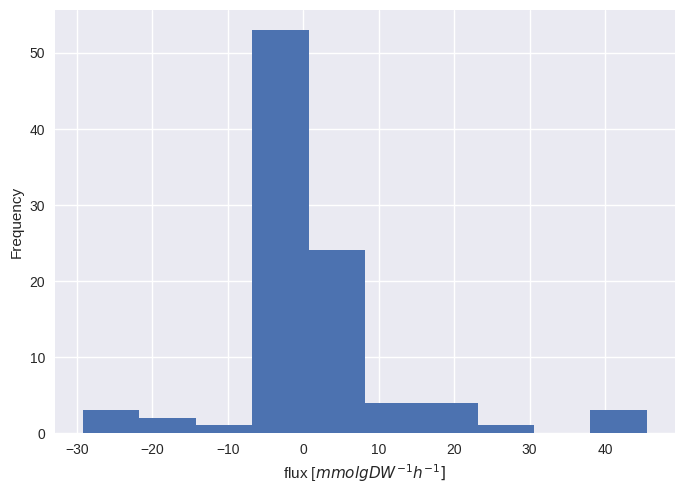

In [38]:
fig = solution.fluxes.hist()
fig.set_xlabel('flux [$mmol gDW^{-1} h^{-1}]$')
fig.set_ylabel('Frequency');

Let's filter the non-zero fluxes.

In [ ]:
solution.fluxes[solution.fluxes != 0.]

ACKr                        3.192215e-14
ACONTa                      6.007250e+00
ACONTb                      6.007250e+00
ACt2r                       3.192215e-14
AKGDH                       5.064376e+00
ATPM                        8.390000e+00
ATPS4r                      4.551401e+01
BIOMASS_Ecoli_core_w_GAM    8.739215e-01
CO2t                       -2.280983e+01
CS                          6.007250e+00
CYTBD                       4.359899e+01
ENO                         1.471614e+01
EX_co2_e                    2.280983e+01
EX_glc__D_e                -1.000000e+01
EX_h_e                      1.753087e+01
EX_h2o_e                    2.917583e+01
EX_nh4_e                   -4.765319e+00
EX_o2_e                    -2.179949e+01
EX_pi_e                    -3.214895e+00
FBA                         7.477382e+00
FUM                         5.064376e+00
G6PDH2r                     4.959985e+00
GAPD                        1.602353e+01
GLCpts                      1.000000e+01
GLNS            

## Metabolic pathway visualizations with Escher

It is quite tedious to try to interpret GSM flux predictions by looking at the raw numbers or statistics. One very useful approach to analyzing simulation results is to plot them on metabolic pathway maps. Luckily a very useful Python package exists for that purpose – [Escher](https://escher.github.io/#/) ([10.1371/journal.pcbi.1004321](http://dx.doi.org/10.1371/journal.pcbi.1004321)).

In [3]:
# ! python -m pip install escher
# ! python -m pip install markupsafe==2.0.1
import escher

You can watch the following [video](https://www.youtube.com/embed/qUipX-xzZjQ) to get an overview of Escher's functionality.

In [4]:
from IPython.display import IFrame
IFrame(width="560", height="315", src="https://www.youtube.com/embed/qUipX-xzZjQ")

With the following you can display all available maps in escher (you can also load you're own which we are not going to cover here).

In [5]:
escher.list_available_maps()

[{'organism': 'Saccharomyces cerevisiae',
  'map_name': 'iMM904.Central carbon metabolism'},
 {'organism': 'Homo sapiens',
  'map_name': 'RECON1.Inositol retinol metabolism'},
 {'organism': 'Homo sapiens', 'map_name': 'RECON1.Glycolysis TCA PPP'},
 {'organism': 'Homo sapiens', 'map_name': 'RECON1.Tryptophan metabolism'},
 {'organism': 'Homo sapiens', 'map_name': 'RECON1.Carbohydrate metabolism'},
 {'organism': 'Homo sapiens',
  'map_name': 'RECON1.Amino acid metabolism (partial)'},
 {'organism': 'Escherichia coli', 'map_name': 'iJO1366.Nucleotide metabolism'},
 {'organism': 'Escherichia coli',
  'map_name': 'iJO1366.Fatty acid biosynthesis (saturated)'},
 {'organism': 'Escherichia coli',
  'map_name': 'iJO1366.Nucleotide and histidine biosynthesis'},
 {'organism': 'Escherichia coli', 'map_name': 'e_coli_core.Core metabolism'},
 {'organism': 'Escherichia coli', 'map_name': 'iJO1366.Central metabolism'},
 {'organism': 'Escherichia coli',
  'map_name': 'iJO1366.Fatty acid beta-oxidation'}

Let's display the map that corresponds to the _E. coli_ core model.

In [1]:
escher.Builder('e_coli_core.Core metabolism')

NameError: name 'escher' is not defined

Ok, now to the data visualization part. Escher can visualization gene, reaction, and metabolite-centric  data. Here an example of visualizing one flux and one metabolite concentration (Escher expect Python dictionaries as data input mapping data values to gene/reaction/metabolite identifiers).

In [7]:
escher.Builder('e_coli_core.Core metabolism',
               reaction_data={'PGK': 100},
               metabolite_data={'ATP': 20})

Builder(metabolite_data={'ATP': 20}, reaction_data={'PGK': 100})

***
**A.**

* Visualize the computed fluxes (see above `solution.fluxes`) on the central carbon metabolism map.

Hints:
* You can convert a pandas Series into a dictionary using the `.to_dict()` method.

In [ ]:
escher.Builder('e_coli_core.Core metabolism',
               reaction_data=solution.fluxes.to_dict())

## Manipulating models

### Making temporary changes to the model

Usually one relies on making copies if objects need to be changed but the original state needs to be retained. Unfortunately, making copies of models is time consuming.

In [47]:
model.optimize()

,fluxes,reduced_costs
ACALD,0.000000,0.000000e+00
ACALDt,0.000000,0.000000e+00
ACKr,0.000000,-0.000000e+00
ACONTa,6.007250,0.000000e+00
ACONTb,6.007250,0.000000e+00
...,...,...
TALA,1.496984,-3.173170e-17
THD2,0.000000,-2.546243e-03
TKT1,1.496984,2.552371e-17
TKT2,1.181498,3.173170e-17


In [48]:
%%time
copy_of_model = model.copy()

CPU times: user 16.7 ms, sys: 201 µs, total: 16.9 ms
Wall time: 16.5 ms


Yes, even milliseconds add up pretty quickly if you need to run many simulations (e.g. if you need to knock out every single gene individually in the model to check if it is essential or not).

In [49]:
%%time
for gene in model.genes:
    mutant = model.copy()
    mutant.genes.get_by_id(gene.id).knock_out()

CPU times: user 2.34 s, sys: 31.3 ms, total: 2.37 s
Wall time: 2.37 s


For that reason cobrapy provides a mechanism that is less time consuming. Almost all methods that make changes to the model such as knocking-out genes, reactions, adding or removing metabolites, reactions etc can be automatically reverted upon exit from a python context. How this works is probably best understood by looking at an example.

In [50]:
%%time
with model:
    for gene in model.genes:
        gene.knock_out()

CPU times: user 1.88 ms, sys: 299 µs, total: 2.18 ms
Wall time: 2.18 ms


Here, the `with model` statements starts the context and changes done to the model one indentation level to the right, are automatically recorded. When that block finishes, the context manager is requested to roll-back all changes leaving the model looking exactly as it did before all the changes.

Changing flux bounds can as indicated also be done reversibly. For example let's set the lower and upper bound of phosphoglycerate kinase to 0 (effectively knocking out the reaction).

In [51]:
with model:
    model.reactions.PGK.bounds = 0, 0
    print("PGK's bounds inside the with statement")
    print(model.reactions.PGK.lower_bound, model.reactions.PGK.bounds)
    print('Mutant growth rate: ', model.optimize().objective_value)
print("PGK's bounds outside the with statement")
print(model.reactions.PGK.bounds)

PGK's bounds inside the with statement
0 (0, 0)
Mutant growth rate:  1.0525207219950656e-15
PGK's bounds outside the with statement
(-1000.0, 1000.0)


### Slim versus full optimize

Mathematical solvers are now so fast that for many small to mid-size models computing the solution can be even faster than it takes us to collect the values from the solver and convert that to objects that are usable for in python. When we use `model.optimize` we gather values for all reactions and metabolites and that can take some time. If we are only interested in the flux value of a single reaction or the objective, it is faster to instead use `model.slim_optimize` which only does the optimization and returns the objective value leaving it up to you to fetch other values that you may need. For example, let's optimize and get the flux value of the `ATPM` reaction.

In [52]:
%%time
solution = model.optimize()
solution.fluxes['ATPM']

CPU times: user 1.1 ms, sys: 0 ns, total: 1.1 ms
Wall time: 1.1 ms


8.39

In [53]:
%%time
model.slim_optimize()
model.reactions.ATPM.flux

CPU times: user 182 µs, sys: 42 µs, total: 224 µs
Wall time: 225 µs


8.39

Again, the difference may seem small but when done thousands of times these small differences can start to become significant.

### Changing the objective function

You can change the objective function like this (e.g. if you'd like to determine the maximum possible production rate of acetate).

In [54]:
with model:
    model.objective = model.reactions.EX_ac_e
    print(model.optimize().objective_value)

20.000000000000004


### Changing the medium

One can access the medium condition using `model.medium`. The indicated bound is the effective upper uptake bound. 

In [55]:
model.medium

{'EX_co2_e': 1000.0,
 'EX_glc__D_e': 10.0,
 'EX_h_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_pi_e': 1000.0}

Changing the carbon source in the medium can be achieved by adjusting the flux bounds of the respective exchange reactions appropriately. For example, the following code block removes glucose from the medium and adds succinate.

In [56]:
medium = model.medium
with model:
    medium['EX_glc__D_e'] = 0
    medium['EX_succ_e'] = 10
    model.medium = medium
    solution = model.optimize()
    print(solution.fluxes['BIOMASS_Ecoli_core_w_GAM'])

0.39756301542776235


Changing the carbon source to succinate led to a significant drop in growth rate.

***
**B.**

* Change the carbon source in the medium to a different carbon source. What is the difference in the growth rate observed?
* How about growing E. coli under anaerobic conditions?
* Now that you know how to compute the maximum production rate of a compound and you know how to manipulate the medium, calculate the theoretical maximum yield of succinate.

Hints:
* Remember that you can use model.reactions.query to find specific metabolites and reactions etc.
* You can use `model.exchanges` to get an overview of available exchange reactions

## Phenotype predictions

### Gene deletions and gene essentiality

#### Knocking out a single gene

In the model, exactly one gene is associated with reaction with [phosphoglycerate kinase](http://bigg.ucsd.edu/universal/reactions/PGK) (PGK).

In [72]:
model.reactions.PGK.genes

frozenset({<Gene b2926 at 0x7fce393831c0>})

Checking the name of this gene in the model (the id is the Blattner number b2926), reveals that it is indeed [pgk](http://ecocyc.org/gene?orgid=ECOLI&id=EG10703).

In [73]:
model.genes.b2926.name

'pgk'

Is [pgk](http://ecocyc.org/gene?orgid=ECOLI&id=EG10703) essential? Let's find out.

#### Perform all possible single gene deletions

Using a `for` loop allows to iterate over all genes in the model and knock out each one of them individually. We're using the model as a context to undo every gene deletion before proceeding to the next knockout.

In [75]:
essentiality = {}
for gene in model.genes:
    with model:
        gene.knock_out()
        essentiality[gene] = model.slim_optimize(error_value=0.)

In [76]:
essentiality

{<Gene b0351 at 0x7fce39381e10>: 0.8739215069684307,
 <Gene b1241 at 0x7fce39381d50>: 0.873921506968431,
 <Gene s0001 at 0x7fce39381d80>: 0.21114065257211526,
 <Gene b1849 at 0x7fce39381db0>: 0.8739215069684305,
 <Gene b3115 at 0x7fce39381f60>: 0.8739215069684302,
 <Gene b2296 at 0x7fce39381d20>: 0.8739215069684302,
 <Gene b1276 at 0x7fce39381cc0>: 0.8739215069684302,
 <Gene b0118 at 0x7fce39382020>: 0.8739215069684302,
 <Gene b0474 at 0x7fce39381ed0>: 0.8739215069684302,
 <Gene b0116 at 0x7fce39381f00>: 0.782351052947739,
 <Gene b0726 at 0x7fce39381de0>: 0.8583074080226885,
 <Gene b0727 at 0x7fce39381e70>: 0.8583074080226885,
 <Gene b2587 at 0x7fce39381f90>: 0.873921506968431,
 <Gene b0356 at 0x7fce39381ff0>: 0.8739215069684302,
 <Gene b1478 at 0x7fce39381fc0>: 0.8739215069684302,
 <Gene b3731 at 0x7fce39382050>: 0.3742298749331115,
 <Gene b3733 at 0x7fce39382080>: 0.37422987493310994,
 <Gene b3735 at 0x7fce393820b0>: 0.37422987493310994,
 <Gene b3739 at 0x7fce393820e0>: 0.87392150696

In [77]:
df = pd.DataFrame.from_dict(essentiality, orient='index')
df = df.rename(columns={0: 'growth'})
df = df.sort_values('growth')

<AxesSubplot: ylabel='Frequency'>

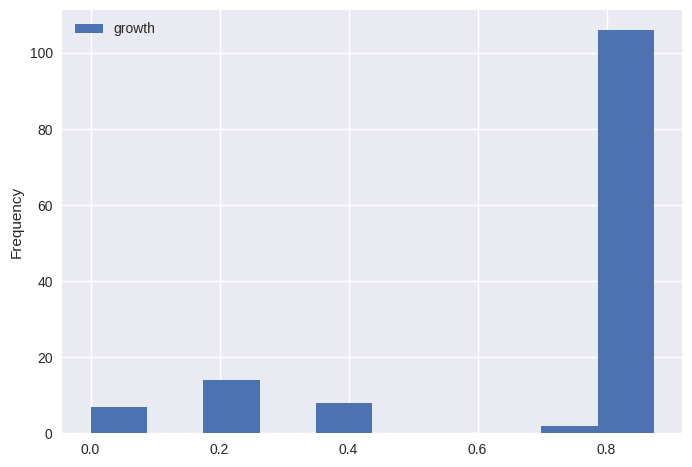

In [78]:
df.plot.hist()

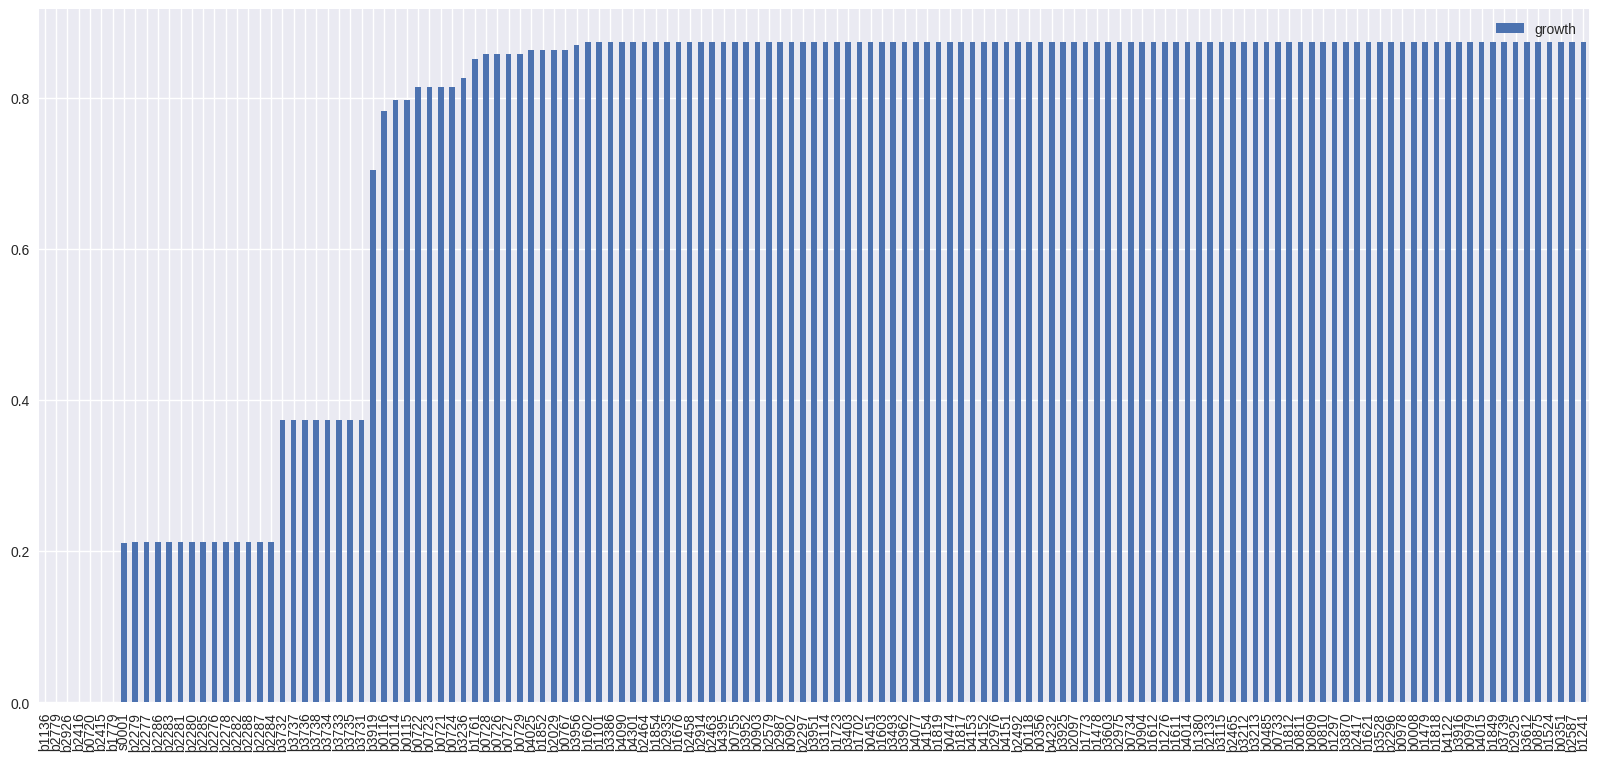

In [79]:
ax = df.plot.bar().axes
ax.figure.set_size_inches(20, 9)

## Phenotypic phase plane analysis

In [80]:
from cobra.flux_analysis.phenotype_phase_plane import production_envelope

In [81]:
ppp_succ = production_envelope(model,
                    reactions=[model.reactions.EX_glc__D_e],
                    objective=model.reactions.BIOMASS_Ecoli_core_w_GAM)

In [82]:
ppp_succ

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_glc__D_e
0,EX_glc__D_e,0.0,0.0,NaN,0.873922,1.584745e+01,NaN,-10.000000
1,EX_glc__D_e,0.0,0.0,NaN,0.827990,1.580658e+01,NaN,-9.498917
2,EX_glc__D_e,0.0,0.0,NaN,0.782058,1.576115e+01,NaN,-8.997835
3,EX_glc__D_e,0.0,0.0,NaN,0.736127,1.571037e+01,NaN,-8.496752
4,EX_glc__D_e,0.0,0.0,NaN,0.690195,1.565323e+01,NaN,-7.995669
5,EX_glc__D_e,0.0,0.0,NaN,0.644263,1.558844e+01,NaN,-7.494586
6,EX_glc__D_e,0.0,0.0,NaN,0.598332,1.551437e+01,NaN,-6.993504
7,EX_glc__D_e,0.0,0.0,NaN,0.552400,1.542887e+01,NaN,-6.492421
8,EX_glc__D_e,0.0,0.0,NaN,0.506469,1.532906e+01,NaN,-5.991338
9,EX_glc__D_e,0.0,0.0,NaN,0.460537,1.521104e+01,NaN,-5.490256


<AxesSubplot: xlabel='EX_glc__D_e'>

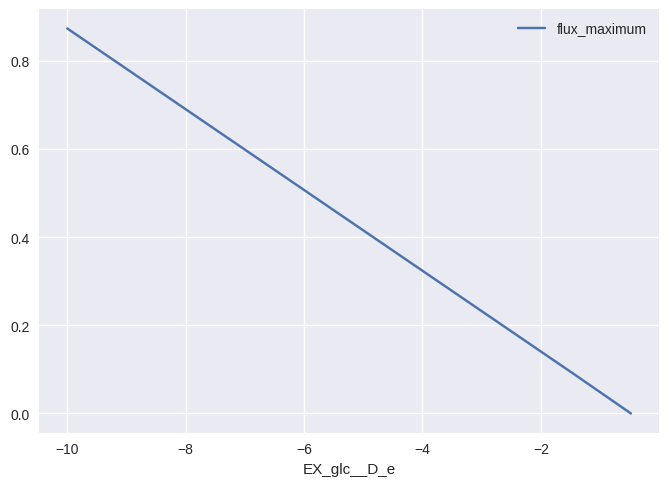

In [83]:
ppp_succ.plot(x='EX_glc__D_e', y='flux_maximum')

***
**C.**

Use `production_envelope` to determine the optimal O2 uptake rate.
***

In [ ]:
## PLOT
